# Курс «Глубокое обучение в компьютерном зрении»

## Урок 1. Обработка изображений

### Домашнее задание к уроку 1

Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio
import scipy.signal

from math import atan, tan, pi, sqrt, ceil, fabs, cos, sin, floor

In [2]:
img = imageio.imread('012.jpg')

In [3]:
print(img.shape)

(1080, 1920, 3)


Загрузили исходную картинку

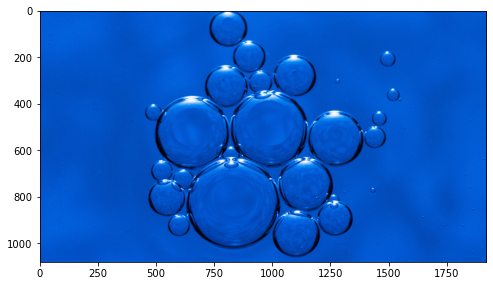

In [4]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

Получили чернобелый вариант

In [5]:
img_bw = np.mean(img, axis=2)

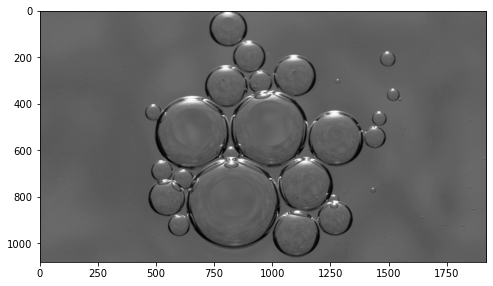

In [6]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bw, cmap='gray')

Вырезали отдельный элемент

In [7]:
img_crop = np.copy(img_bw[875:970, 549:644])

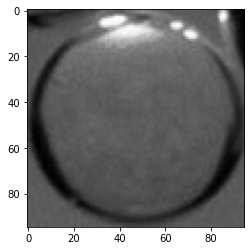

In [8]:
plt.imshow(img_crop, cmap='gray')

In [9]:
print(img_crop.shape)

(95, 95)


Определим границы пузырька

Найдем вертикальные границы

In [10]:
wv = [[-1,0,1], [-1,0,1], [-1,0,1]]

out_img_1 = np.zeros((img_bw.shape[0] - 2, img_bw.shape[1] - 2),  dtype=np.float32)
out_img_1 = np.abs(scipy.signal.correlate2d(img_bw, wv, mode='valid'))

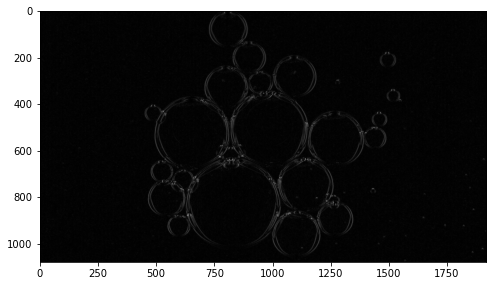

In [11]:
out_img_1 = out_img_1.astype(np.float32) / 255.

plt.figure(figsize=(8, 8))
plt.imshow(out_img_1, cmap='gray')

Найдем горизонтальные границы

In [12]:
wh = [[-1,-1,-1], [0,0,0], [1,1,1]]

out_img_2 = np.zeros((img_bw.shape[0] - 2, img_bw.shape[1] - 2),  dtype=np.float32)
out_img_2 = np.abs(scipy.signal.correlate2d(img_bw, wh, mode='valid'))

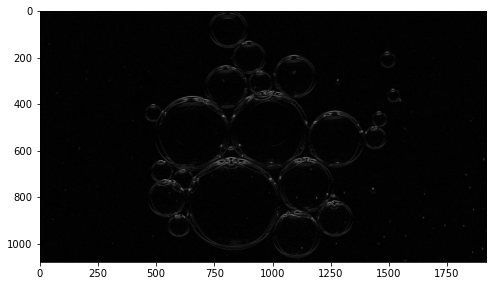

In [13]:
out_img_2 = out_img_2.astype(np.float32) / 255.

plt.figure(figsize=(8, 8))
plt.imshow(out_img_2, cmap='gray')

Сложим получившиеся границы

In [14]:
out_img = out_img_1 + out_img_2

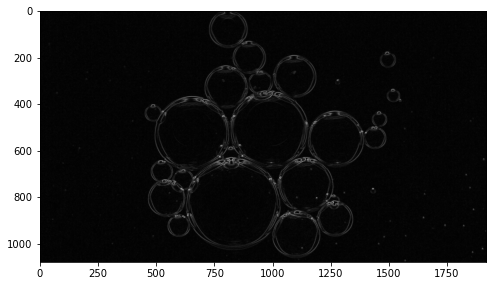

In [15]:
out_img = out_img.astype(np.float32) / 255.

plt.figure(figsize=(8, 8))
plt.imshow(out_img, cmap='gray')